In [9]:
%pylab inline
# make plot bigger
pylab.rcParams['figure.figsize'] = (15.0, 12.0)
import csv
import numpy as np
import pandas as pd

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


In [10]:
trace_file="/home/tiratatp/Repositories/snia_traces/T3/DisplayAdsPayload/Combined/disk0.txt"
last_block=1953525167
# each bin should be 1 GiB
# 1 GiB is 512B * 2097152
# 10 GiB is 512B * 20971520
bin_size=2097152 

In [11]:
pd_trace=pd.read_csv(trace_file, delimiter=" ", names=["disk", "blknum", "blkcount", "flag"], index_col=0)
pd_trace.head()

,disk,blknum,blkcount,flag
140.875,0,23645612,8,1
439.065,0,67596,8,0
439.413,0,143913571,16,0
439.626,0,143853507,8,0
439.754,0,143853491,8,0


In [12]:
# filter just small writes
requests = pd_trace[np.logical_and(pd_trace['blkcount'] <= 64, pd_trace['flag'] == 0)]
requests = requests['blknum']

In [13]:
bin_count = int(np.ceil(float(max(requests)) / bin_size))
bins = [i * bin_size for i in xrange(bin_count + 1)]

hist, bin_edges  = np.histogram(requests, bins=bins)
print hist, bin_edges

[ 72949  37195   5257 165911   4744   3553      0      0      0      0
      0     95      0      0      0      0      0      0      0      0
      0      0      0      0      0      0      0      0      0      0
      0      0      0      0      0      0      0      0      0      0
      0      0      0      0      0      0      0      0      0      0
      0      0    112     57     18      0      0      0      0      0
      0      0      0      0      0    808   1366    634  36442      0
      0      0      0      0      0      0      0      0      0      0
      0      0      0      0      0      0      0      0      0      0
      0      0      0      0    271    765    148      1    295    342
    112    183    279    518    390    708    449    475    492     83
    186    117    192    795    259    338    375    237    199    417
    172    151     46      0      0      0      0      0      0      0
      0      0    126      0    474    282    108    262      0    409
      

In [14]:
need=int(np.floor(last_block/bin_size))
if len(hist) > need:
    # since our bin is 1GiB, we need 1024 bins
    current_range = (0, need)
    current_count = sum([hist[i] for i in xrange(current_range[0], current_range[1])])
    max_count = current_count
    max_range = current_range
    print "Starting Range:", current_range, current_count
    for i in xrange(need, len(hist)):
        current_range = (current_range[0] + 1, current_range[1] + 1)        
        current_count = sum([hist[i] for i in xrange(current_range[0], current_range[1])])
        if current_count > max_count:
            max_count = current_count
            max_range = current_range
    print "Max Range:", max_range, max_count
else:
    max_range = (0, len(hist))
    max_count = sum([hist[i] for i in xrange(max_range[0], max_range[1])])    

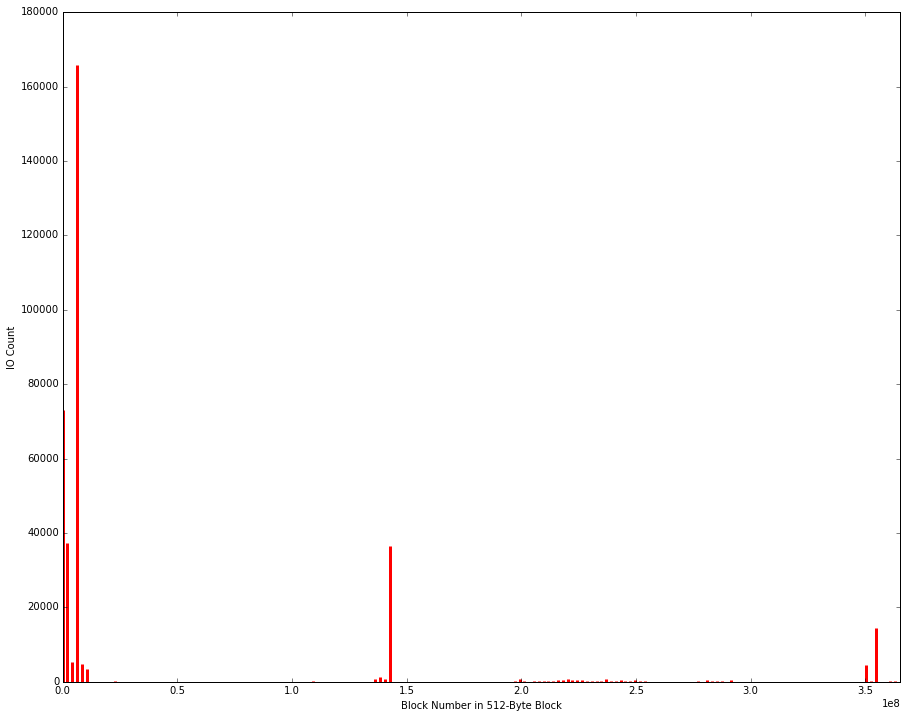

In [15]:
barlist = plt.bar(bin_edges[:-1], hist, width = 1, linewidth=3)
plt.xlim(min(bin_edges), max(bin_edges))
for i in xrange(max_range[0], max_range[1]):
    barlist[i].set_color('r')
plt.xlabel("Block Number in 512-Byte Block")
plt.ylabel("IO Count")
plt.show()   

In [16]:
print "You need to filter from", bin_edges[max_range[0]], "to", bin_edges[max_range[1]]
print "You should get", max_count, "IOs"

You need to filter from 0 to 364904448
You should get 359410 IOs
